In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
data = pd.read_csv('housing.csv')

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [196]:
data.dropna(inplace=True)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [198]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data[['median_house_value']]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [200]:
train_data = X_train.join(y_train)

In [201]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12808,-121.47,38.63,29.0,2197.0,520.0,1374.0,483.0,2.1889,INLAND,69300.0
18606,-122.13,37.15,39.0,2854.0,613.0,1338.0,518.0,3.9423,NEAR OCEAN,180300.0
4319,-118.34,34.08,52.0,1430.0,186.0,547.0,178.0,10.3661,<1H OCEAN,500001.0
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,<1H OCEAN,167700.0
18312,-122.13,37.43,40.0,3454.0,648.0,1498.0,647.0,5.2114,NEAR BAY,438400.0
...,...,...,...,...,...,...,...,...,...,...
14291,-117.13,32.73,52.0,2676.0,557.0,1181.0,537.0,3.6058,NEAR OCEAN,213100.0
962,-121.91,37.68,18.0,3631.0,547.0,1700.0,520.0,5.8170,<1H OCEAN,257300.0
1572,-122.00,37.82,20.0,2206.0,458.0,926.0,432.0,4.6042,<1H OCEAN,256400.0
7012,-118.07,33.96,30.0,928.0,230.0,913.0,214.0,2.6991,<1H OCEAN,147100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

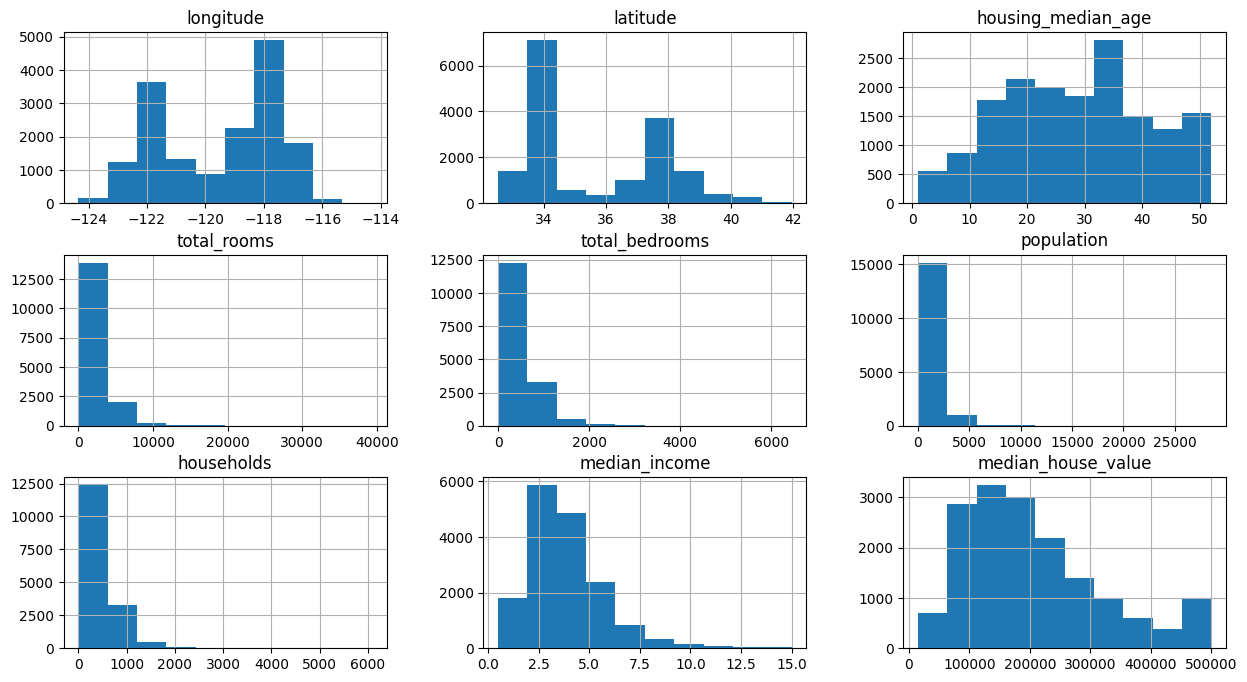

In [202]:
train_data.hist(figsize = (15,8))

In [203]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924276,-0.106591,0.038388,0.063578,0.094298,0.050696,-0.015506,-0.045918
latitude,-0.924276,1.000000,0.010536,-0.030151,-0.061618,-0.104853,-0.066971,-0.078612,-0.144304
housing_median_age,-0.106591,0.010536,1.000000,-0.360783,-0.319167,-0.297509,-0.301412,-0.122012,0.103113
total_rooms,0.038388,-0.030151,-0.360783,1.000000,0.930423,0.861282,0.918566,0.197780,0.128818
total_bedrooms,0.063578,-0.061618,-0.319167,0.930423,1.000000,0.882441,0.979684,-0.007599,0.045842
population,0.094298,-0.104853,-0.297509,0.861282,0.882441,1.000000,0.911367,0.005370,-0.027554
households,0.050696,-0.066971,-0.301412,0.918566,0.979684,0.911367,1.000000,0.013426,0.061768
median_income,-0.015506,-0.078612,-0.122012,0.197780,-0.007599,0.005370,0.013426,1.000000,0.684781
median_house_value,-0.045918,-0.144304,0.103113,0.128818,0.045842,-0.027554,0.061768,0.684781,1.000000


<Axes: >

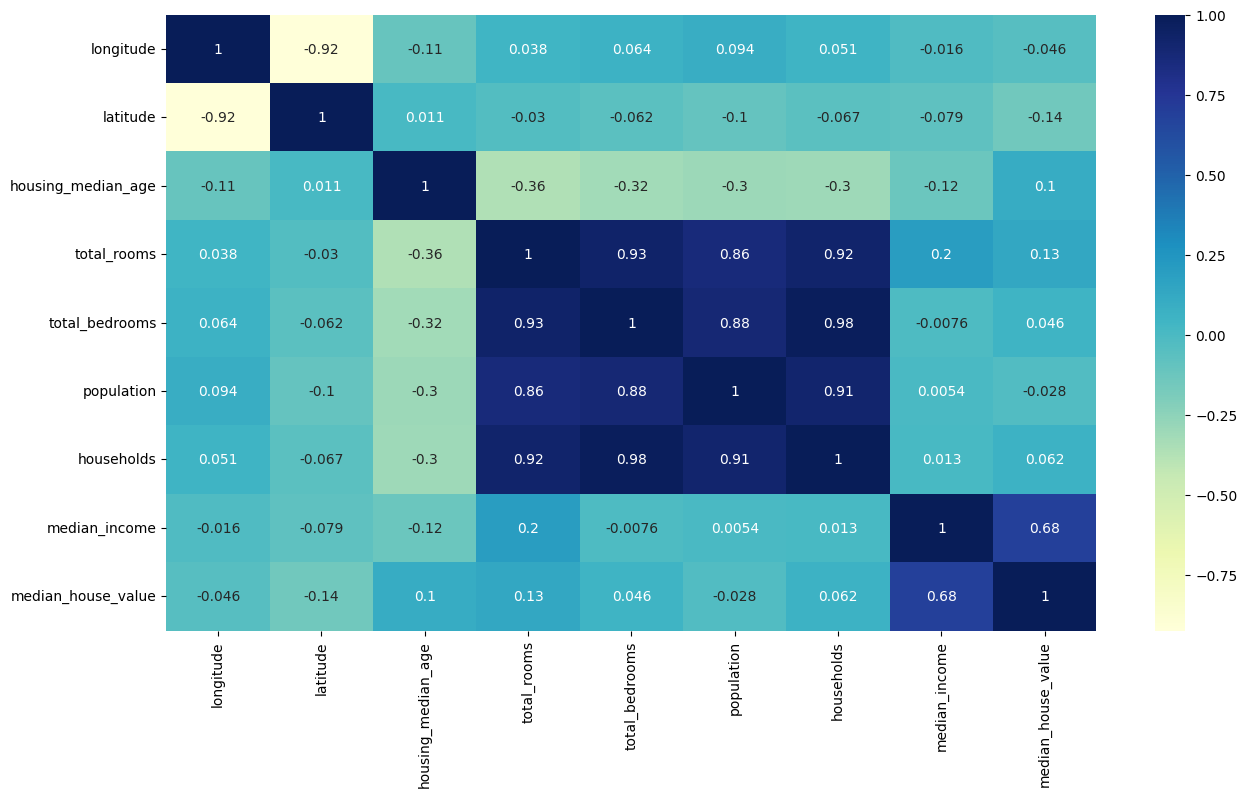

In [204]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap = "YlGnBu")

In [205]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

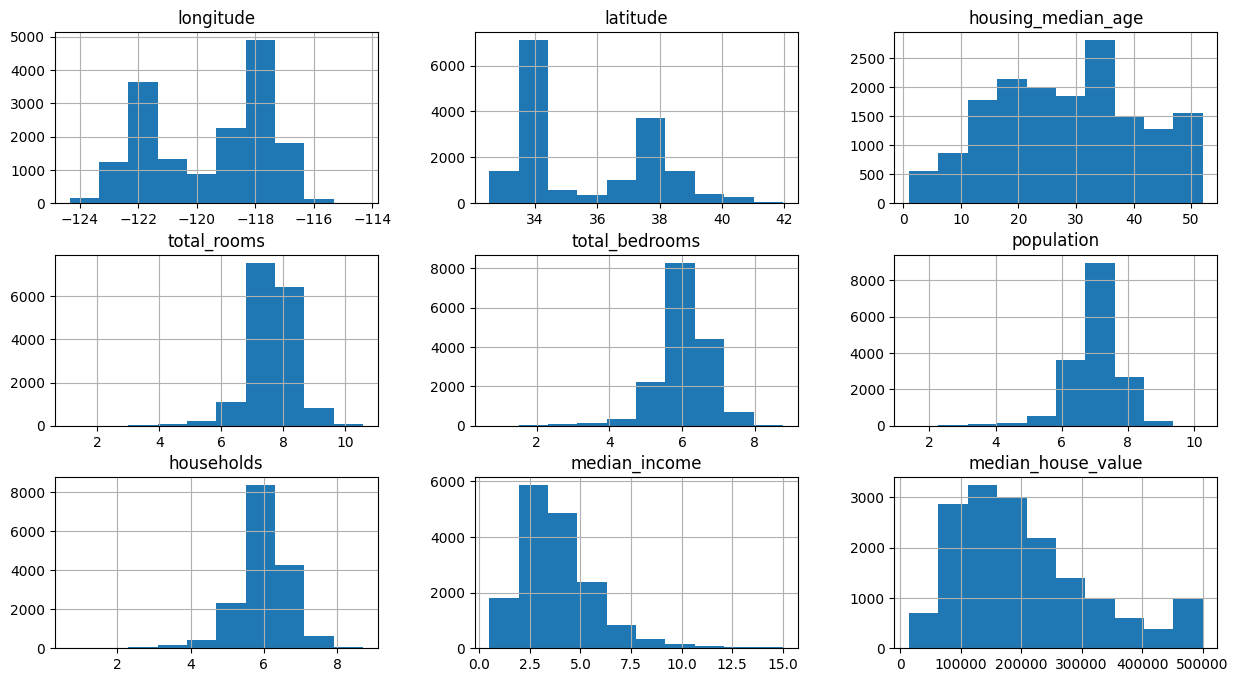

In [206]:
train_data.hist(figsize=(15,8))

In [207]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [208]:
train_data = train_data.astype(float)

<Axes: >

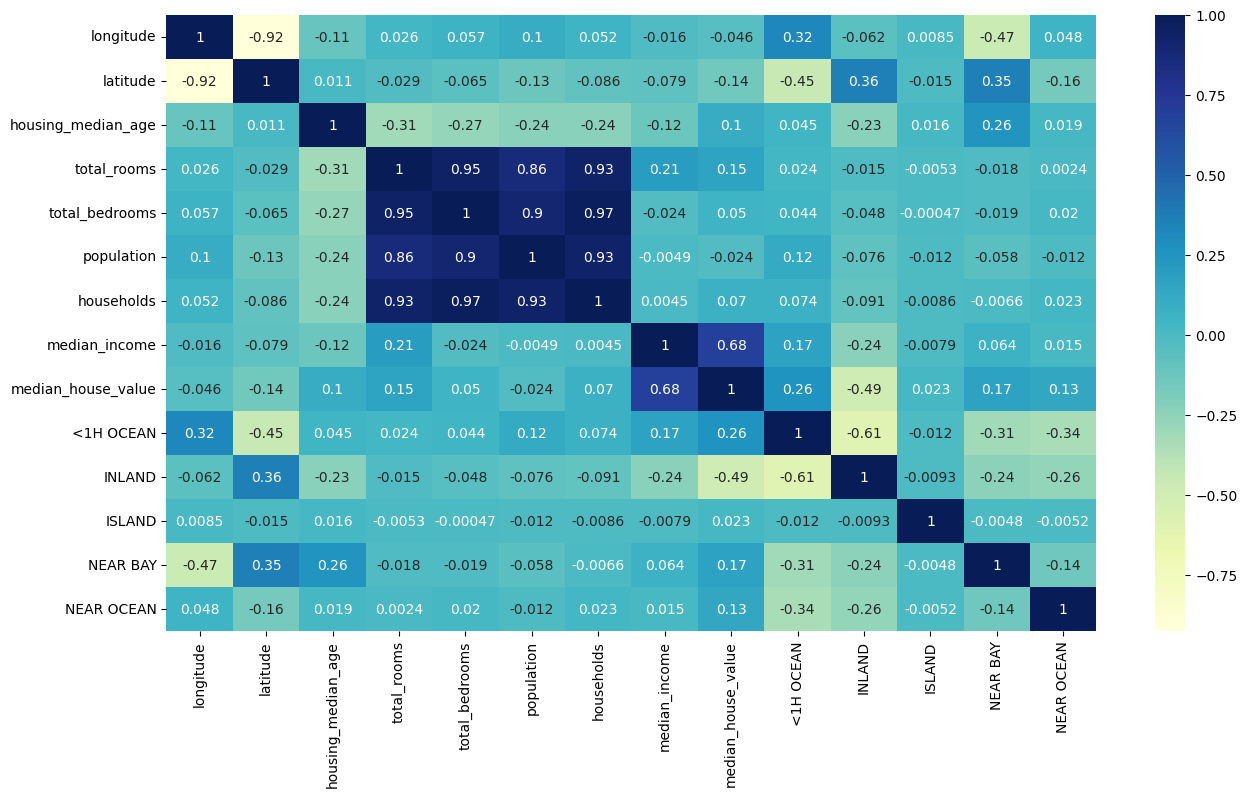

In [209]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap = "YlGnBu")

In [210]:
train_data = train_data[train_data['households'] != 0]

<Axes: xlabel='latitude', ylabel='longitude'>

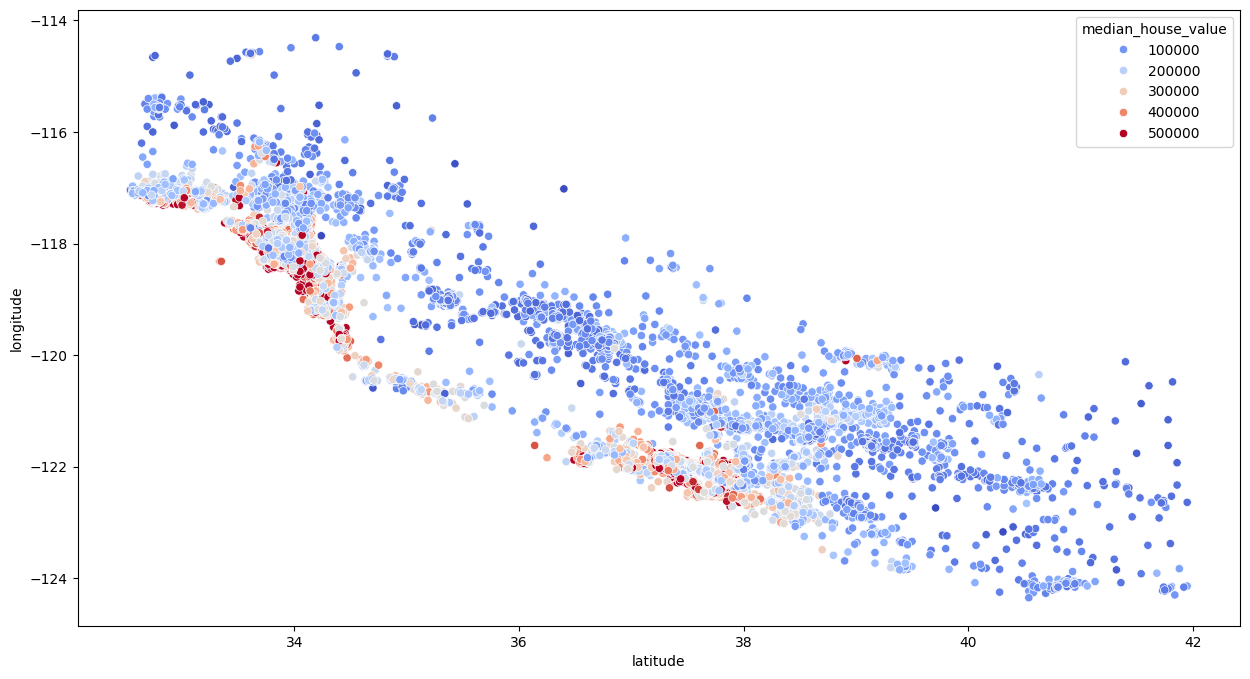

In [211]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [212]:
train_data['bedroon_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

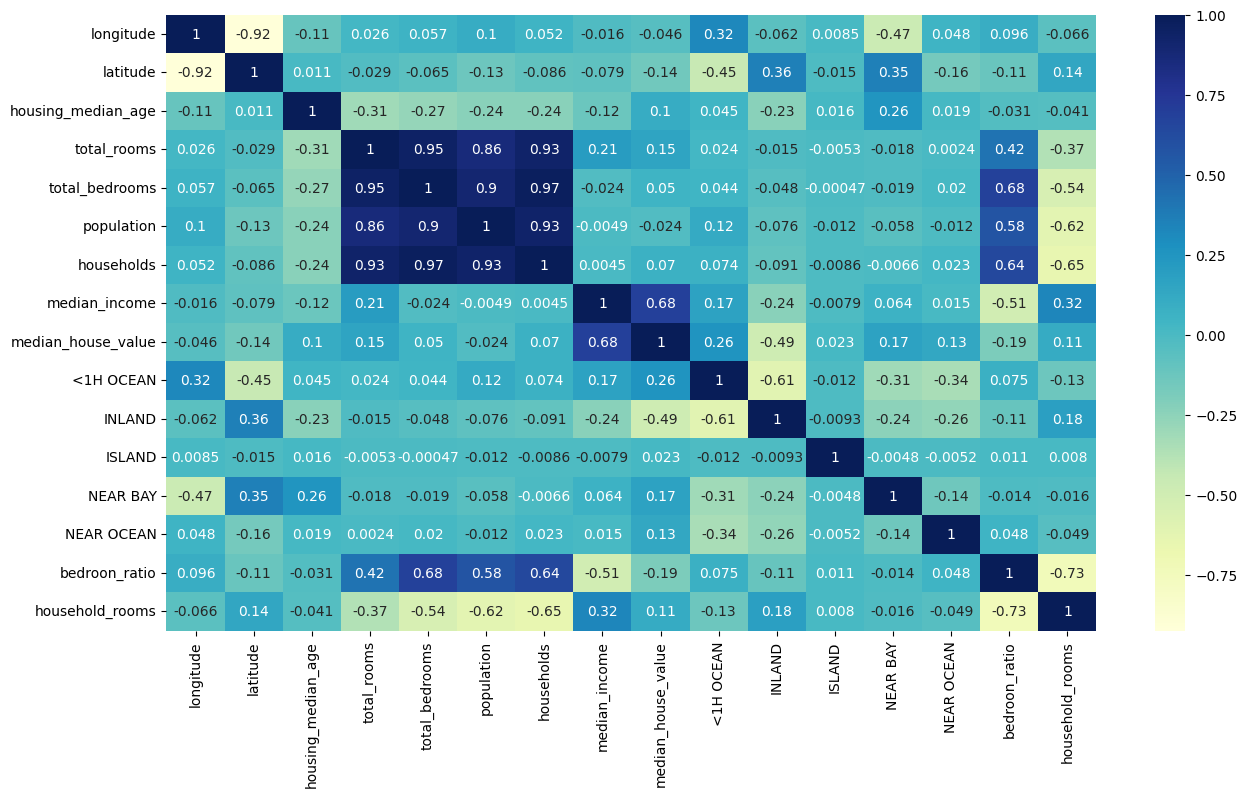

In [213]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap = "YlGnBu")

In [231]:
print(np.isinf(train_data).any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
<1H OCEAN             False
INLAND                False
ISLAND                False
NEAR BAY              False
NEAR OCEAN            False
bedroon_ratio         False
household_rooms       False
dtype: bool


In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [245]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroon_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [246]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [247]:
X_test_s = scaler.transform(X_test)

In [248]:
reg.score(X_test_s,y_test)

-0.7373807348064318

In [249]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [255]:
forest.score(X_test,y_test)

0.5224366877144822

In [257]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score =True)

grid_search.fit(X_train_s,y_train)
                           

C:\Users\Shaheer Mahmood\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [258]:
best_forest = grid_search.best_estimator_

In [259]:
best_forest.score(X_test_s,y_test)

0.6066947838721446

In [264]:
y_pred = best_forest.predict(X_test)

C:\Users\Shaheer Mahmood\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [265]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.DataFrame(y_test.values, columns=['True Value'])
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Value'])

In [266]:
results_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

In [267]:
results_df.to_csv('results_with_predictions.csv', index=False)